In [ ]:
import pandas as pd
df = pd.read_csv('http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv', header = 0, sep = ',')
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Số thuộc tính có giá trị liên tục:  11
Điều chỉnh số hàng: 3, số cột: 4 để phù hợp với 11 đồ thị.


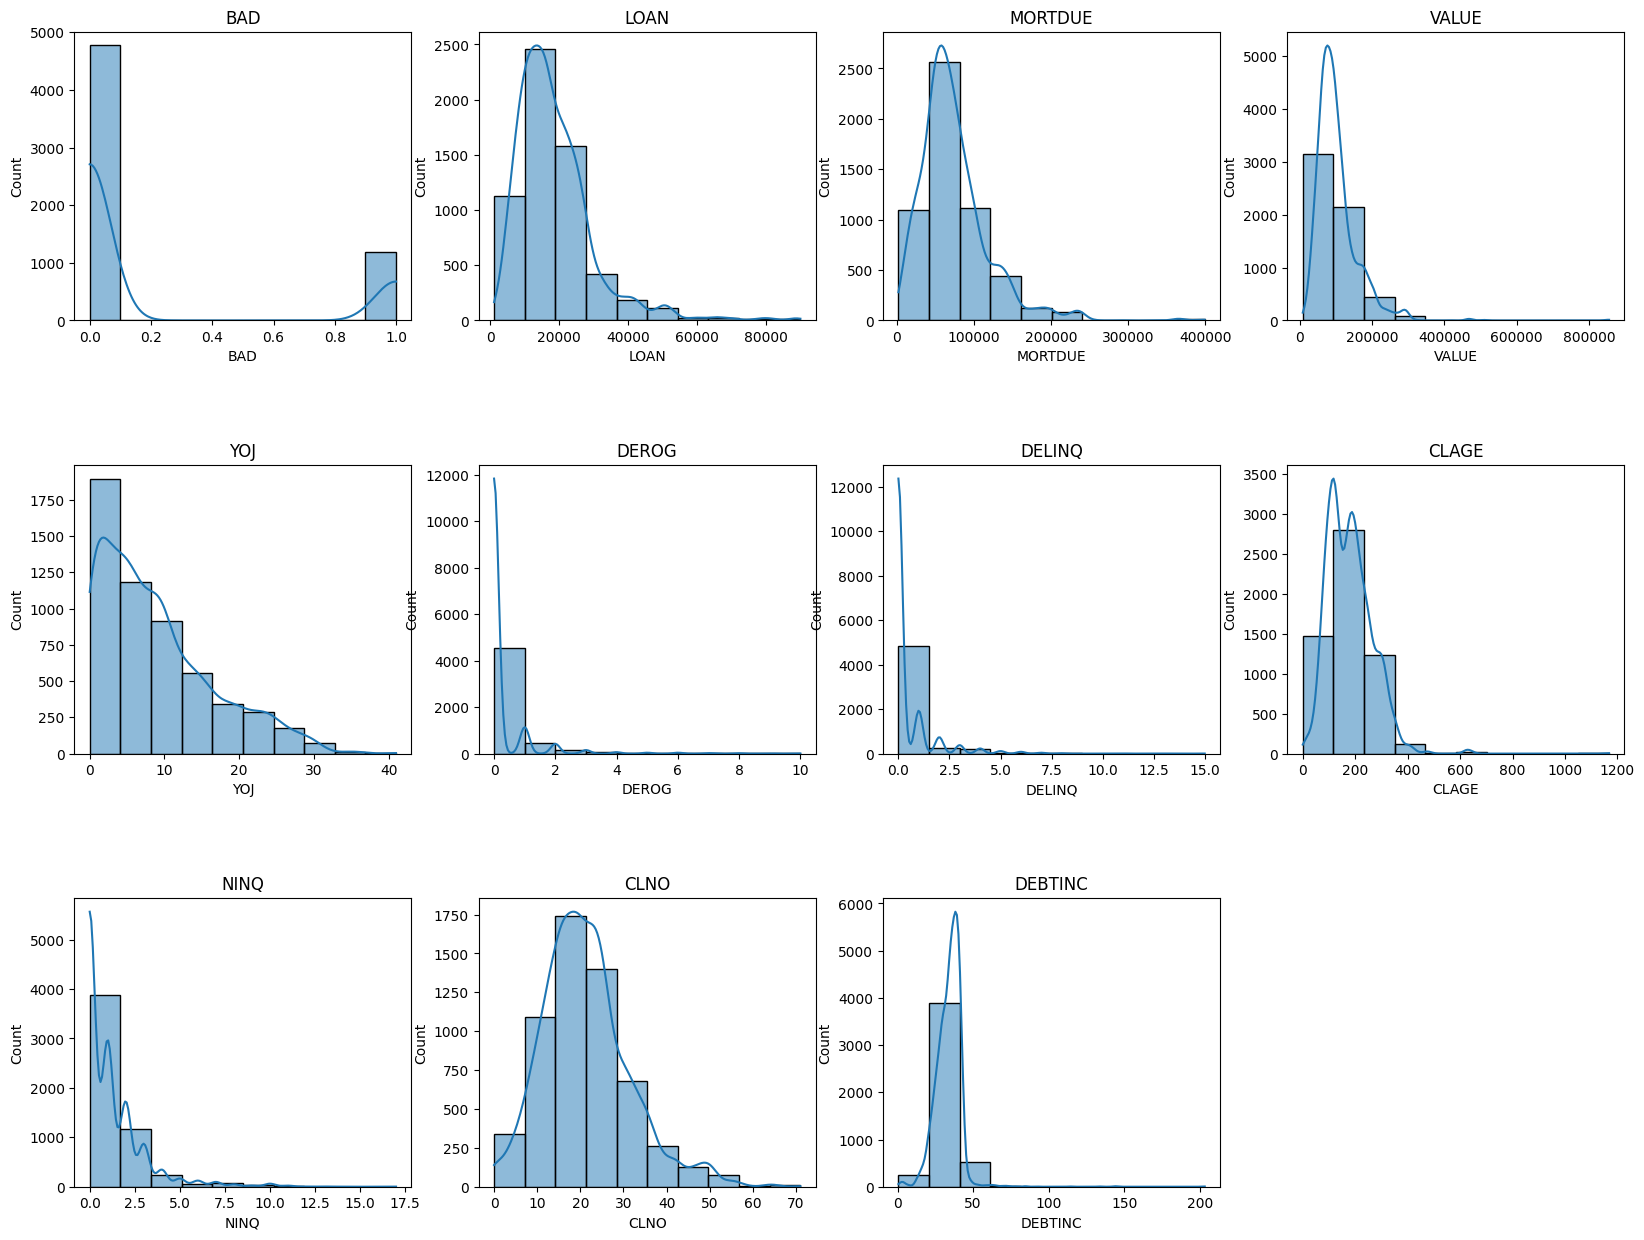

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float', 'int']).columns

def _plot_numeric_classes(df, col, bins=10, kde=True):
    sns.histplot(df[col], bins=bins, kde=kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins=10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    num_cols = len(numeric_cols)
    print('Số thuộc tính có giá trị liên tục: ', num_cols)

    total_plots = row * col
    if total_plots < num_cols:
        col = (num_cols + row - 1) // row  # Tính số cột mới
        print(f"Điều chỉnh số hàng: {row}, số cột: {col} để phù hợp với {num_cols} đồ thị.")

    plt.figure(figsize=figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

    for i in range(num_cols):
        try:
            plt.subplot(row, col, i + 1)
            _plot_numeric_classes(df, numeric_cols[i], bins=bins)
            plt.title(numeric_cols[i])
        except Exception as e:
            print(f'Lỗi đồ thị {numeric_cols[i]}: {e}')
            continue  # Tiếp tục với biểu đồ tiếp theo nếu có lỗi

    plt.show()

_distribution_numeric(df, numeric_cols)

Số thuộc tính phân loại:  2


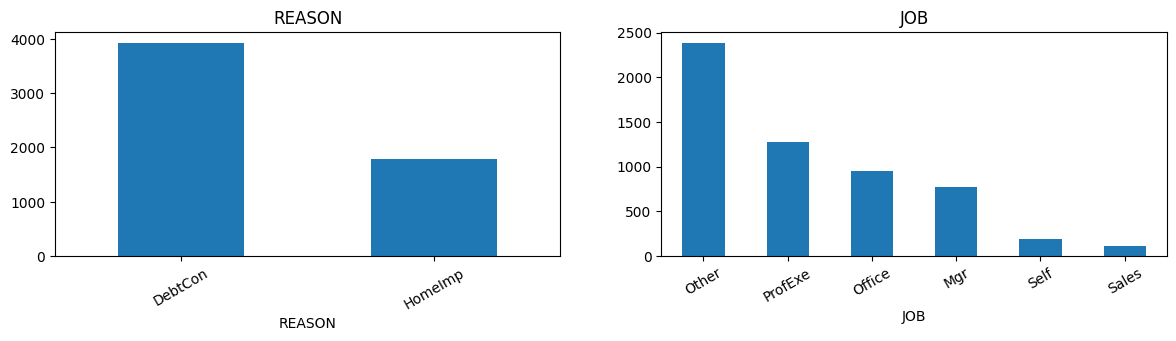

In [ ]:
import matplotlib.pyplot as plt

cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, col):
    df[col].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row=1, col=2, figsize=(20, 5)):
    '''
    cate_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    '''
    print('Số thuộc tính phân loại: ', len(cate_cols))
    plt.figure(figsize=figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

    for i in range(1, len(cate_cols) + 1):
        try:
            plt.subplot(row, col, i)
            _plot_bar_classes(df, cate_cols[i - 1])
            plt.title(cate_cols[i - 1])
            plt.xticks(rotation=30)
        except Exception as e:
            print(f'Lỗi đồ thị {cate_cols[i - 1]}: {e}')
            break

    plt.show()

_distribution_cate(df, cate_cols, row=4, col=4, figsize=(30, 16))

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['BAD'])
X_train = df_train.copy()
y_train = X_train.pop("BAD")

X_test = df_test.copy()
y_test = X_test.pop("BAD")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4768, 12) (4768,)
(1192, 12) (1192,)


In [ ]:
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [ ]:
from sklearn.pipeline import Pipeline #tạo pipepline để xử lý các bước theo 1 thứ tự
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý giá trị thiếu bằng cách thay thế với giá trị xuất hiện nhiều nhất
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot,
        #giúp mô hình hiểu rằng các giá trị này là độc lập với nhau, không có quan hệ thứ tự hay xếp hạng nào giữa chúng.
    ]
)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý dữ liệu thiếu bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý dữ liệu thiếu bằng MinMax scaler
    ]
)

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l2',
tol=0.0001,
C=1.0,
fit_intercept=True,
class_weight=None,
solver = 'lbfgs',
max_iter = 100)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# pipeline huấn luyện hoàn thành
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor),
            ("classifier", LogisticRegression(penalty='l2', C=0.5, max_iter=200, class_weight={0: 0.3, 1: 0.7}))
    ]
)

# huấn luyện
completed_pl.fit(X_train, y_train)

# độ chính xác
y_train_pred = completed_pl.predict(X_train)
print(f"Độ chính xác trên tập train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Độ chính xác trên tập test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Độ chính xác trên tập train: 0.82
Độ chính xác trên tập test: 0.82
